## Assignment 1: Linear Regression

This notebooks presents examples for reference, plus the exercises that are part of first week, which should be submitted as instructed in the assignments [page](https://daniel-yukimura.github.io/assingments-image-processing-lab/).<br>

We'll practice how to fit linear models into data using numpy and a few other helping libraries.<br>

### Example 1: Population $\times$ Profit

Our first data example consists on data about the profit of some big franchise paired with the population size in each city. We want to use a linear model to predict how much profit we would make depending on the size of the city.<br>

Let's use pandas library to give a look at data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
datapath = os.path.join(os.getcwd(), 'data')
data = pd.read_csv(os.path.join(datapath, 'profit.txt'), header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


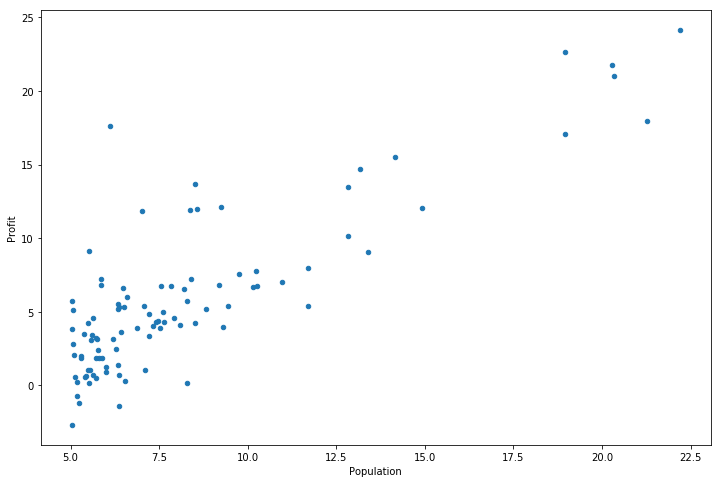

In [5]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Let's fit a simple linear model of the form
$$\hat{y}(x\mid w,b) = w x + b$$
using **empirical risk minimization**.<br>
We add the *fake bias* column of ones so we can write it in matrix form

In [6]:
data.insert(0, 'Ones', 1)
X = np.matrix(data.iloc[:,0:2].values)
y = np.matrix(data.iloc[:,2:3].values)
theta = np.matrix(np.array([0,0])) #initial value

Scikit-learn linear regression algorithm computes (apart from numerical details) the ordinary least squares solution.

In [7]:
x_sample = np.linspace(data.Population.min(), data.Population.max(), 100)
X_sample = np.c_[np.ones(100), x_sample]

In [8]:
from sklearn import linear_model

/Users/hallpaz/Workspace/deep_env/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Text(0.5,1,'Predicted Profit vs. Population Size')

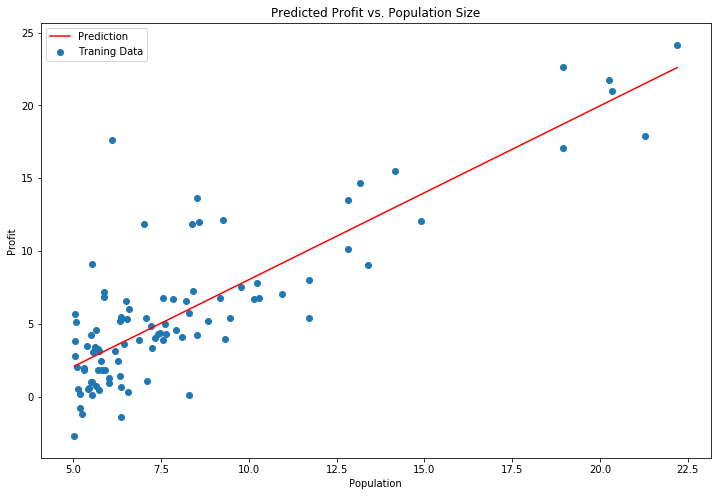

In [9]:
model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_sample).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_sample, y_pred, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

We can also fit the data using a gradient based method to minimize the empirical risk

In [10]:
def empRisk(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / len(X)

In [11]:
empRisk(X,y,theta)

64.14546775491135

In [12]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = empRisk(X, y, theta)
        
    return theta, cost

In [13]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [14]:
empRisk(X,y,g)

9.031911006157824

How this compares with the least squares solution?

In [15]:
empRisk(X,y, np.matrix(np.array([model.intercept_[0], model.coef_[0,1]]))) 
#model coefficients have a strange format

8.953942751950354

Text(0.5,1,'Predicted Profit vs. Population Size')

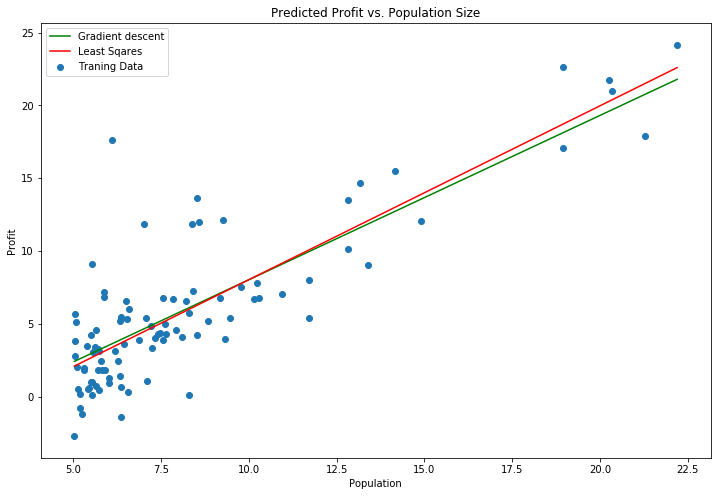

In [16]:
y_gd = g[0, 0] + (g[0, 1] * x_sample)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_sample, y_gd, 'g', label='Gradient descent')
ax.plot(x_sample, y_pred, 'r', label='Least Sqares')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Since the gradient descent function also returns a vector with the evolution of empirical risk during training, we can observe how it decreases with the number of iterations.

Text(0.5,1,'Error vs. Training Epoch')

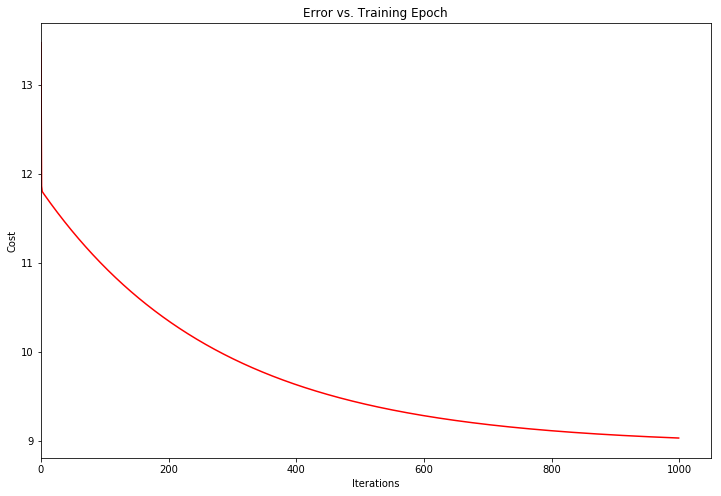

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlim(xmin=0)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

The problem we are dealing is convex, therefore is expected that gradient descent converge.
***

### Exercise 1: Explicit solution for simple linear regression
In this case, both input and output are scalars, i.e. of dimension 1. 
* Show that the solution for the **Empirical Risk Minimization** strategy (see [slides](https://daniel-yukimura.github.io/schedules-image-processing-lab/slides/class_1_Machine-Learning.pdf)) in this case is given by the following equations:

$$\hat{w}_n = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2} \hspace{.75cm}\left(\approx \frac{cov[X,Y]}{var[X]}\right)$$

$$\hat{b}_n = \bar{y}-\hat{w}_n \bar{x} \hspace{.75cm} \left(\approx \mathbb{E}[Y] - \hat{w}_n\mathbb{E}[X]\right)$$

where $\bar{v} = \frac{1}{n} \sum_{i=1}^nv_i$ is the mean value of a vector.

* Implement a function that computes the explicit solution for simple linear regression and apply to the **profit.txt** data-set loaded previously.


In [20]:
# Part 2
def simple_ERM_solution(x_samples, y_samples):
    y_mean = np.mean(y_samples)
    x_mean = np.mean(x_samples)
    x_center = x_samples - x_mean
    y_center = y_samples - y_mean
    num = np.sum(np.array([x_center[i]*y_center[i] for i in range(x_center)]))
    den = np.sum(np.array([x_center[i]*x_center[i] for i in range(x_center)]))
    w = num/den
    b = y_mean - w*x_mean
    return w, b

w, b = simple_ERM_solution(X, y)
predicted = w*X + b

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X, predicted, 'r', label='Prediction')
ax.scatter(X, y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

TypeError: only integer scalar arrays can be converted to a scalar index

### Exercise 2: House Prices
* Load the **train_house_prices.csv** data set.<br>

* Write a function that receives the name of two columns (INPUT/OUTPUT) and returns the **ERM** solution for the simple linear regression model. Use to plot the linear relation between **LotArea** and **SalePrice**.<br>

One way of measuring how one feature affects another is by looking at correlation coefficients:

$$corr(X,Y) = \frac{cov(X,Y)}{\sigma_x \sigma_y} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\left(\sum_{i=1}^n(x_i - \bar{x})^2\right)\left(\sum_{i=1}^n(y_i - \bar{y})^2\right)}}$$

The more $corr(X,Y)$ is closer to $1$ the more the variables are positive correlated, and when they are close to $-1$ we say they are negatively correlated. If the correlation is near zero, then the variables don't have a strong linear relation.<br>

* Implement a function that compute correlation between variables of the house-prices data-set. Find the variables that have the highest positive and negative (if there are) correlation with **SalePrice** and plot the linear regression result in this cases.<br>

* Use correlation coefficients to determine which variables are more relevant ($|corr(X,Y)|>\varepsilon$) to predict **SalePrice**.

* Fit a multivariable linear regression using the variables you have selected to predict **SalePrice**. In this case is prefered that you use gradient descent to find the solution of the problem. 

* Load the **test_house_prices.csv** data set and implement a gradient descent function that computes the error in the test set during training, plot this against the number of iterations.

* Analyse and comment the results you obtained.


### Exercise 3: House Values vs Crime Rate (EXTRA)
**(This exercise is not mandatory, but reccomended)**<br>
The data set is from Philadelphia, PA - USA and includes average house sales price in a number of neighborhoods. For each neighborhood we have attributes associated, which include their crime rate.

* Load the data set Philadelphia_Crime_Rate_noNA.csv
* Fit a linear regression model taking **CrimeRate** as feature to predict **HousePrice**, and analyse the results.

**Center City** is a region with an extremely high crime rate, yet the house prices are not too low.

* What is the effect of this region in the model? Remove **Center City** and redo the analysis. Compare the first and the new model.<br> (The Center City region comprises of elements with attribute MilesPhila$=0$)

* There are other outliers in the problem? Test for example removing high-value houses (>350000) and observe if this is a influential factor in the fitting.
